***Bagging vs Random Forest***

In [1]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [2]:
# creating a dataset
X,Y = make_classification(n_features=5,
                          n_redundant=0,
                          n_informative=5,
                          n_clusters_per_class= 1 
                          )

In [3]:
df = pd.DataFrame(data= X,
                  columns= ['col1', 'col2', 'col3', 'col4', 'col5'])
df['target'] = Y
df.head(7)

,col1,col2,col3,col4,col5,target
0,-0.304246,-1.837589,-1.611862,0.591353,-0.528572,0
1,1.150272,-0.422482,-0.535355,0.778169,-1.422324,0
2,0.122824,-0.975114,-0.437440,-0.827233,-1.869941,0
3,-1.517940,1.535634,1.030829,1.033520,-1.439276,1
4,-2.506806,1.212072,0.777722,0.371641,-0.523878,1
5,3.759204,-0.539140,-0.437426,-0.583619,-2.860923,0
6,-0.932922,-2.435308,-2.121298,1.822842,0.091666,0


In [4]:
# Bagging Technique
dt = DecisionTreeClassifier()
bag = BaggingClassifier(estimator = DecisionTreeClassifier(), # default is DT
                        max_features= 2 # saying column sampling is to be done
                        )

In [5]:
bag.fit(df.iloc[ :, :5], df.iloc[:, -1])

BaggingClassifier(estimator=DecisionTreeClassifier(), max_features=2)

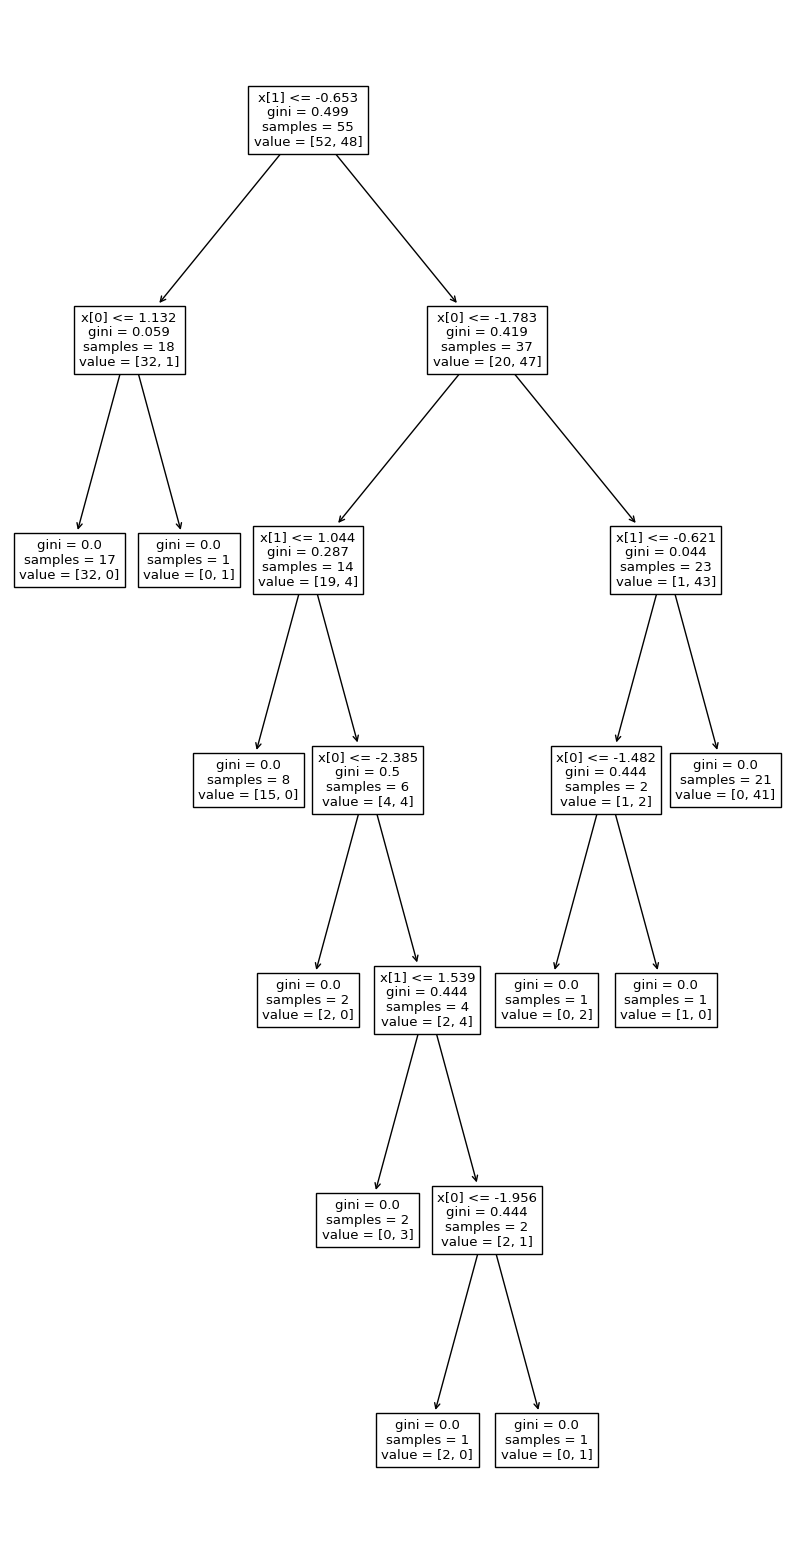

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,20))
plot_tree(bag.estimators_[0]) 
plt.show()
# only 0, 1 column has been used

In [7]:
# Random Forest
rf =RandomForestClassifier(max_features=2)

In [8]:
rf.fit(df.iloc[ :, :5], df.iloc[:, -1])

RandomForestClassifier(max_features=2)

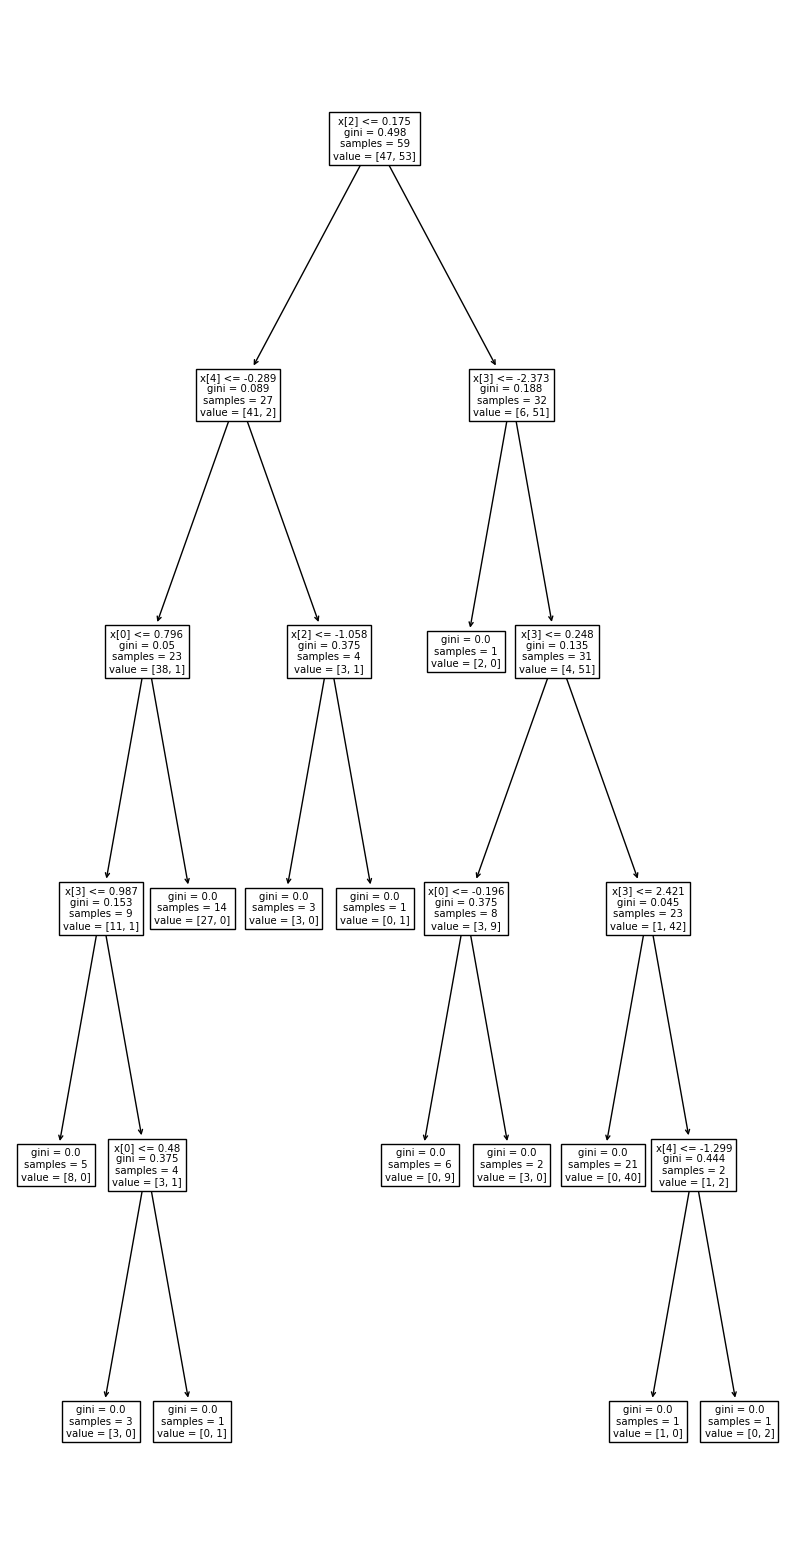

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,20))
plot_tree(rf.estimators_[4]) # Use the figsize or dpi arguments of plt.figure to control the size of the rendering.
plt.show()
# at each node level, different columns has been used

In [23]:
# attributes of rf class
rf.n_outputs_ # no of outputs

1

In [29]:
rf.classes_ #The classes labels

array([0, 1])

In [30]:
rf.n_classes_ # The number of classes 

2

In [24]:
rf.estimators_ # Collection of fitted sub-estimators.

[DecisionTreeClassifier(max_features=2, random_state=589606464),
 DecisionTreeClassifier(max_features=2, random_state=1577416017),
 DecisionTreeClassifier(max_features=2, random_state=231000965),
 DecisionTreeClassifier(max_features=2, random_state=1231127693),
 DecisionTreeClassifier(max_features=2, random_state=84350315),
 DecisionTreeClassifier(max_features=2, random_state=741316168),
 DecisionTreeClassifier(max_features=2, random_state=1551950873),
 DecisionTreeClassifier(max_features=2, random_state=468365843),
 DecisionTreeClassifier(max_features=2, random_state=2113743768),
 DecisionTreeClassifier(max_features=2, random_state=972123998),
 DecisionTreeClassifier(max_features=2, random_state=1144822646),
 DecisionTreeClassifier(max_features=2, random_state=749458742),
 DecisionTreeClassifier(max_features=2, random_state=590947472),
 DecisionTreeClassifier(max_features=2, random_state=1876570303),
 DecisionTreeClassifier(max_features=2, random_state=1040045990),
 DecisionTreeClassi

In [26]:
rf.estimator_ # child estimator used to create the collection of fitted sub-estimators.
# base algorithm

DecisionTreeClassifier()

In [27]:
rf.feature_names_in_ # Names of features seen during fit. 

array(['col1', 'col2', 'col3', 'col4', 'col5'], dtype=object)

In [28]:
rf.n_features_in_ #Number of features seen during fit.

5